In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv

nfl_data_path = "output_data/nfl.csv"

nfl_data = pd.read_csv(nfl_data_path, encoding="latin1")
nfl_data

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,raw_score_difference (home-away),team_away,...,favourite_score_difference,spread_favorite,win_loss,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,22,BAL,...,-22,-7.5,True,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,-2,NE,...,-2,-10.5,False,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,-5,SEA,...,-5,-3.5,True,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,3,CIN,...,-3,-3.0,False,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,-13,MIA,...,13,-2.5,False,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,13511,1/22/2023,2022,Division,True,BUF,10,27,-17,CIN,...,17,-6.0,False,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2693,13512,1/22/2023,2022,Division,True,SF,19,12,7,DAL,...,-7,-3.5,True,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2694,13513,1/29/2023,2022,Conference,True,KC,23,20,3,CIN,...,-3,-1.5,True,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2695,13514,1/29/2023,2022,Conference,True,PHI,31,7,24,SF,...,-24,-2.5,True,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [2]:
# Separate columns needed
nfl_data = nfl_data[["schedule_season","team_home", "score_home", "score_away", "raw_score_difference (home-away)", "team_away", "team_favorite_id", "favourite_direction", "favourite_score_difference", "spread_favorite", "win_loss"]].copy()

# Rename multiple columns
nfl_data_clean = nfl_data.rename(columns={'schedule_season': 'Season', 'team_home': 'Home Team', 'score_home': 'Home Team Score','score_away': 'Away Team Score', 'raw_score_difference (home-away)': 'Score Difference', 'team_away': 'Away Team ID', 'team_favorite_id': 'Team Favourite ID', 
                                          'favourite_direction': 'Home/Away Direction', 'favourite_score_difference':'Home/Away Direction Diff','spread_favorite':'Spread Favourite', 'win_loss':'Win/Loss'})

nfl_data_clean

,Season,Home Team,Home Team Score,Away Team Score,Score Difference,Away Team ID,Team Favourite ID,Home/Away Direction,Home/Away Direction Diff,Spread Favourite,Win/Loss
0,2013,DEN,49,27,22,BAL,DEN,Home,-22,-7.5,True
1,2013,BUF,21,23,-2,NE,NE,Away,-2,-10.5,False
2,2013,CAR,7,12,-5,SEA,SEA,Away,-5,-3.5,True
3,2013,CHI,24,21,3,CIN,CHI,Home,-3,-3.0,False
4,2013,CLE,10,23,-13,MIA,CLE,Home,13,-2.5,False
...,...,...,...,...,...,...,...,...,...,...,...
2692,2022,BUF,10,27,-17,CIN,BUF,Home,17,-6.0,False
2693,2022,SF,19,12,7,DAL,SF,Home,-7,-3.5,True
2694,2022,KC,23,20,3,CIN,KC,Home,-3,-1.5,True
2695,2022,PHI,31,7,24,SF,PHI,Home,-24,-2.5,True


In [3]:
# Determine whether it was a win or loss for the Spread Favourite
nfl_data_clean["Win/Loss"] = nfl_data_clean["Win/Loss"].apply(lambda x: 'Win' if x==True else 'Loss')
nfl_data_clean

,Season,Home Team,Home Team Score,Away Team Score,Score Difference,Away Team ID,Team Favourite ID,Home/Away Direction,Home/Away Direction Diff,Spread Favourite,Win/Loss
0,2013,DEN,49,27,22,BAL,DEN,Home,-22,-7.5,Win
1,2013,BUF,21,23,-2,NE,NE,Away,-2,-10.5,Loss
2,2013,CAR,7,12,-5,SEA,SEA,Away,-5,-3.5,Win
3,2013,CHI,24,21,3,CIN,CHI,Home,-3,-3.0,Loss
4,2013,CLE,10,23,-13,MIA,CLE,Home,13,-2.5,Loss
...,...,...,...,...,...,...,...,...,...,...,...
2692,2022,BUF,10,27,-17,CIN,BUF,Home,17,-6.0,Loss
2693,2022,SF,19,12,7,DAL,SF,Home,-7,-3.5,Win
2694,2022,KC,23,20,3,CIN,KC,Home,-3,-1.5,Win
2695,2022,PHI,31,7,24,SF,PHI,Home,-24,-2.5,Win


In [4]:
# Calculate how many games were a Win or a Loss for each NFL Season
win_loss_count = nfl_data_clean.groupby(["Season", "Win/Loss"]).count()
win_loss_count = nfl_data_clean.groupby(["Season", "Win/Loss"]).count()["Spread Favourite"].reset_index()
win_loss_count

,Season,Win/Loss,Spread Favourite
0,2013,Loss,136
1,2013,Win,129
2,2014,Loss,142
3,2014,Win,125
4,2015,Loss,149
5,2015,Win,113
6,2016,Loss,128
7,2016,Win,137
8,2017,Loss,138
9,2017,Win,128


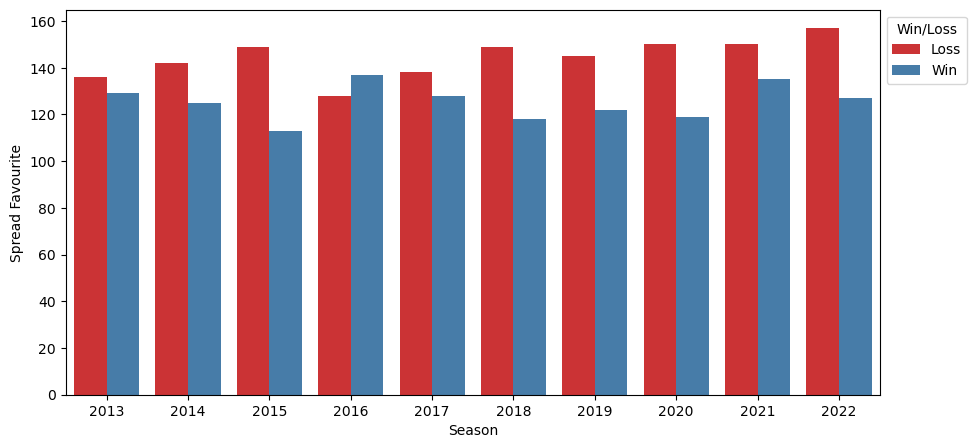

In [5]:
# Import seaborn
import seaborn as sns

# Create a Bar Chart
plt.figure(figsize=(10.5,5))
sns.set_palette("Set1")
ax = sns.barplot(data= win_loss_count, x= "Season", y= "Spread Favourite", hue="Win/Loss")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("winlossbar.png")

In [6]:
win_loss_team = nfl_data_clean.groupby(["Home Team", "Win/Loss"]).count()
win_loss_team = nfl_data_clean.groupby(["Home Team", "Win/Loss"]).count()["Spread Favourite"].reset_index()
win_loss_team

,Home Team,Win/Loss,Spread Favourite
0,ARI,Loss,48
1,ARI,Win,34
2,ATL,Loss,49
3,ATL,Win,35
4,BAL,Loss,53
...,...,...,...
59,TB,Win,35
60,TEN,Loss,47
61,TEN,Win,36
62,WAS,Loss,45


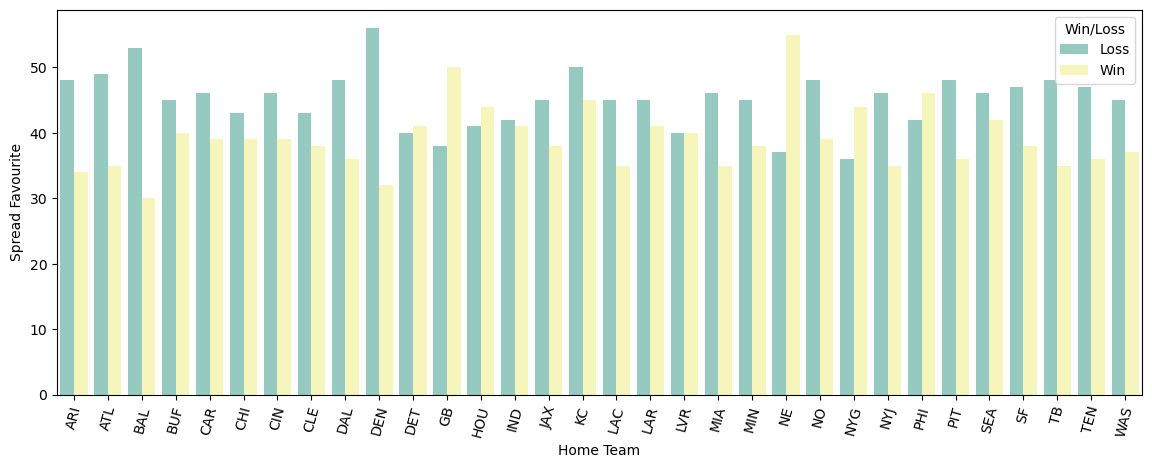

In [7]:
# Import seaborn
import seaborn as sns

# Create a Bar Chart
plt.figure(figsize=(14,5))

plt.xticks(rotation=75)

sns.set_palette("Set3")

sns.barplot(data= win_loss_team, x="Home Team", y="Spread Favourite", hue="Win/Loss")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("hometeam.png")

In [8]:
# Track the max and min values
max_value = float('-inf')
min_value = float('inf')

# Iterate over the values in the column
for value in win_loss_team['Spread Favourite']:
    if value > max_value:
        max_value = value
    if value < min_value:
        min_value = value

# Print the max and min values
print("Maximum value:", max_value)
print("Minimum value:", min_value)

Maximum value: 56
Minimum value: 30


In [9]:
max_team = win_loss_team.groupby(["Home Team"]).max()["Spread Favourite"] 
max_team.sort_values()

Home Team
LVR    40
DET    41
IND    42
CHI    43
CLE    43
NYG    44
HOU    44
MIN    45
LAR    45
LAC    45
JAX    45
WAS    45
BUF    45
SEA    46
CIN    46
CAR    46
MIA    46
NYJ    46
PHI    46
TEN    47
SF     47
PIT    48
TB     48
ARI    48
DAL    48
NO     48
ATL    49
GB     50
KC     50
BAL    53
NE     55
DEN    56
Name: Spread Favourite, dtype: int64

In [10]:
min_team = win_loss_team.groupby(["Home Team"]).min()["Spread Favourite"]
min_team.sort_values()

Home Team
BAL    30
DEN    32
ARI    34
ATL    35
TB     35
NYJ    35
MIA    35
LAC    35
PIT    36
NYG    36
DAL    36
TEN    36
NE     37
WAS    37
JAX    38
SF     38
GB     38
MIN    38
CLE    38
CAR    39
CHI    39
CIN    39
NO     39
DET    40
LVR    40
BUF    40
LAR    41
HOU    41
IND    41
PHI    42
SEA    42
KC     45
Name: Spread Favourite, dtype: int64

In [11]:
win_loss_team = nfl_data_clean.groupby(["Away Team ID", "Win/Loss"]).count()
win_loss_team = nfl_data_clean.groupby(["Away Team ID", "Win/Loss"]).count()["Spread Favourite"].reset_index()
win_loss_team

,Away Team ID,Win/Loss,Spread Favourite
0,ARI,Loss,46
1,ARI,Win,38
2,ATL,Loss,43
3,ATL,Win,38
4,BAL,Loss,52
...,...,...,...
59,TB,Win,38
60,TEN,Loss,46
61,TEN,Win,40
62,WAS,Loss,41


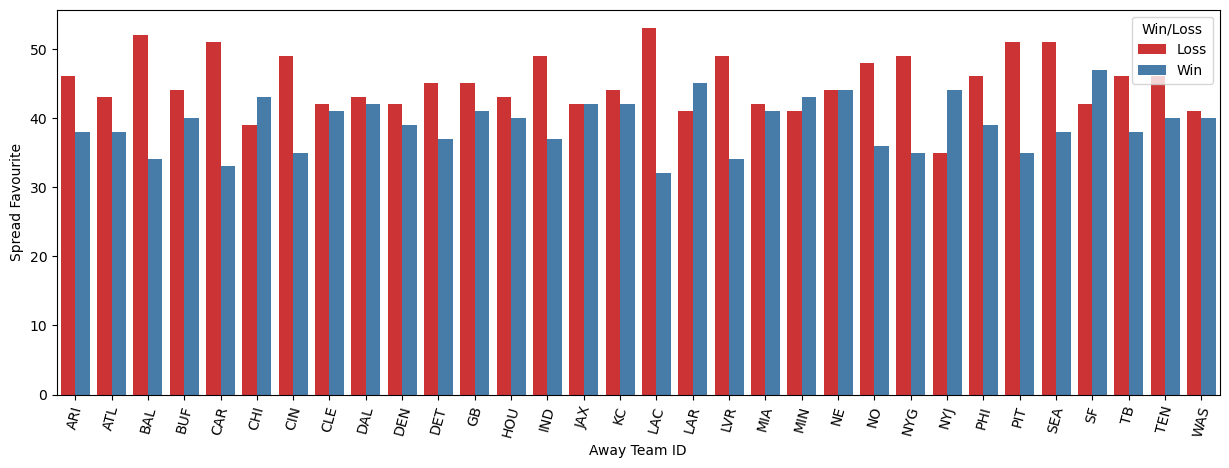

In [12]:
# Import seaborn
import seaborn as sns

# Create a Bar Chart
plt.figure(figsize=(15,5))

plt.xticks(rotation=75)
sns.set_palette("Set1")

sns.barplot(data= win_loss_team, x="Away Team ID", y="Spread Favourite", hue="Win/Loss")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1))
plt.savefig("awayteam.png")

In [13]:
# Track the max and min values
max_value = float('-inf')
min_value = float('inf')

# Iterate over the values in the column
for value in win_loss_team['Spread Favourite']:
    if value > max_value:
        max_value = value
    if value < min_value:
        min_value = value

# Print the max and min values
print("Maximum value:", max_value)
print("Minimum value:", min_value)

Maximum value: 53
Minimum value: 32


In [14]:
max_team = win_loss_team.groupby(["Away Team ID"]).max()["Spread Favourite"]
max_team.sort_values()

Away Team ID
WAS    41
MIA    42
CLE    42
DEN    42
JAX    42
ATL    43
MIN    43
CHI    43
DAL    43
HOU    43
NYJ    44
NE     44
KC     44
BUF    44
DET    45
LAR    45
GB     45
ARI    46
TEN    46
TB     46
PHI    46
SF     47
NO     48
NYG    49
CIN    49
LVR    49
IND    49
PIT    51
SEA    51
CAR    51
BAL    52
LAC    53
Name: Spread Favourite, dtype: int64

In [15]:
min_team = win_loss_team.groupby(["Away Team ID"]).min()["Spread Favourite"]
min_team.sort_values()

Away Team ID
LAC    32
CAR    33
LVR    34
BAL    34
NYG    35
NYJ    35
PIT    35
CIN    35
NO     36
DET    37
IND    37
SEA    38
TB     38
ATL    38
ARI    38
CHI    39
DEN    39
PHI    39
WAS    40
TEN    40
HOU    40
BUF    40
MIA    41
MIN    41
GB     41
CLE    41
LAR    41
JAX    42
DAL    42
SF     42
KC     42
NE     44
Name: Spread Favourite, dtype: int64